# Capstone 1 - NLP Chatbot - Industry Accidents Dataset


## CONTEXT:

The database comes from one of the biggest industry in Brazil and in the world. It is an urgent need for industries/companies around the globe to understand why employees still suffer some injuries/accidents in plants. Sometimes they also die in such environment.

Great Learning


1.   Kajal
2.   Damini
3.   Ashwini
4.   Anish



### DATA DESCRIPTION:
This The database is basically records of accidents from 12 different plants in 03 different countries which every line in the data is an occurrence of an accident.
#### Columns description:



*   Data: timestamp or time/date information
*   Countries: which country the accident occurred (anonymised)
*   Local: the city where the manufacturing plant is located (anonymised)
*   Industry sector: which sector the plant belongs to
*   Accident level: from I to VI, it registers how severe was the accident (I means not severe but VI means very severe)
*   Potential Accident Level: Depending on the Accident Level, the database also registers how severe the accident could have been (due to other factors involved in the accident)
*   Genre: if the person is male of female
*   Employee or Third Party: if the injured person is an employee or a third party
*   Critical Risk: some description of the risk involved in the accident
*   Description: Detailed description of how the accident happened.

Link to download the dataset: https://www.kaggle.com/ihmstefanini/industrial-safety-and-health-analytics-database

**Mounting Drive**


In [ ]:
import tensorflow
tensorflow.__version__

'2.4.1'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pyspellchecker

     |████████████████████████████████| 2.5MB 12.1MB/s 


**Importing Libraries**

In [ ]:
#Importing standard Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from os import path
from PIL import Image
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import re
import nltk
import string
from nltk.corpus import stopwords
from spellchecker import SpellChecker 
from nltk.stem import WordNetLemmatizer 
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dropout,Bidirectional,Dense,Flatten,Add,Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras import regularizers, optimizers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.model_selection import train_test_split
import random
random.seed(0)

import warnings
warnings.filterwarnings("ignore")

**Extract the zip file**

In [ ]:
glove_file = '/content/drive/MyDrive/Copy of glove.6B.zip'

from zipfile import ZipFile
with ZipFile(glove_file) as z:
  z.extractall()

In [ ]:
EMBEDDING_FILE = './glove.6B.200d.txt'

### **Loading Dataset and EDA**

In [ ]:
dataset_path = '/content/drive/MyDrive/Colab Notebooks/Data/industrial_safety_and_health_database_with_accidents_description.csv'

In [ ]:
data = pd.read_csv(dataset_path)
data.head(5)

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [ ]:
data.shape

(425, 11)

There are 425 rows and 11 columns in the dataset

In [ ]:
data.isnull().sum()

Unnamed: 0                  0
Data                        0
Countries                   0
Local                       0
Industry Sector             0
Accident Level              0
Potential Accident Level    0
Genre                       0
Employee or Third Party     0
Critical Risk               0
Description                 0
dtype: int64

There are no null values in the dataset

In [ ]:
data.Description[4]

'Approximately at 11:45 a.m. in circumstances that the mechanics Anthony (group leader), Eduardo and Eric Fernández-injured-the three of the Company IMPROMEC, performed the removal of the pulley of the motor of the pump 3015 in the ZAF of Marcy. 27 cm / Length: 33 cm / Weight: 70 kg), as it was locked proceed to heating the pulley to loosen it, it comes out and falls from a distance of 1.06 meters high and hits the instep of the right foot of the worker, causing the injury described.'

In [ ]:
data.Description[12]

'The collaborator reports that he was working in the Ustulación and realized that the cyclone duct was obstructed and opened the door to try to unclog the same and the material detached and projected towards the employee causing small burn in the right heel.'

In [ ]:
data["Industry Sector"].unique()

array(['Mining', 'Metals', 'Others'], dtype=object)

In [ ]:
data["Accident Level"].unique()

array(['I', 'IV', 'III', 'II', 'V'], dtype=object)

In [ ]:
data["Potential Accident Level"].unique()

array(['IV', 'III', 'I', 'II', 'V', 'VI'], dtype=object)

In [ ]:
data["Employee or Third Party"].unique()

array(['Third Party', 'Employee', 'Third Party (Remote)'], dtype=object)

#### **Graphical Representation**

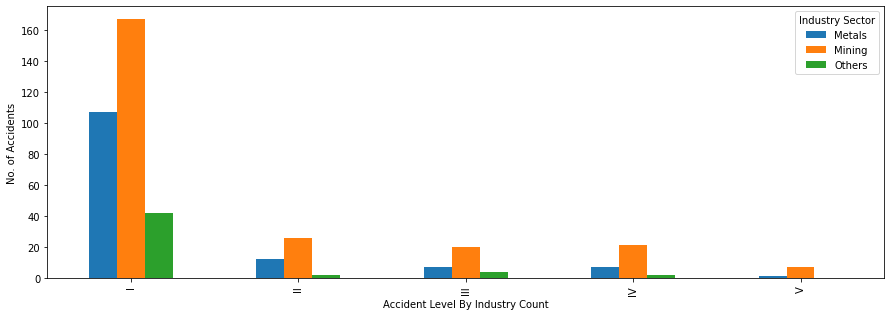

In [ ]:

pd.crosstab(data['Accident Level'],data['Industry Sector']).plot(kind='bar',figsize=(15,5))
plt.xlabel('Accident Level By Industry Count')
plt.ylabel('No. of Accidents')
plt.show()

Insights:

1. We have more number of accidents in the mining sector followed by metal industry.
2. More number of accidents belongs to accident level 1 while level 5 has the least number of accidents.

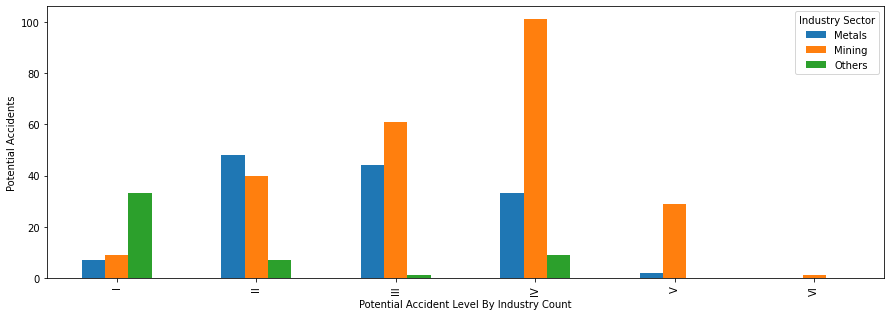

In [ ]:
pd.crosstab(data['Potential Accident Level'],data['Industry Sector']).plot(kind='bar',figsize=(15,5))
plt.xlabel('Potential Accident Level By Industry Count')
plt.ylabel('Potential Accidents')
plt.show()

Insights:

1. Mining is maximum prone to accidents, followed by Metals.
2. Potential Accident level IV has maximum probability to occur.

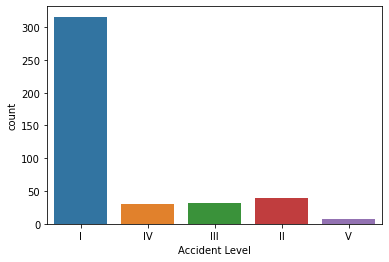

In [ ]:
sns.countplot(data['Accident Level'])

There are almost 300 accidents cases that belongs to accident level 1 while level 5 has the least number of accidents cases

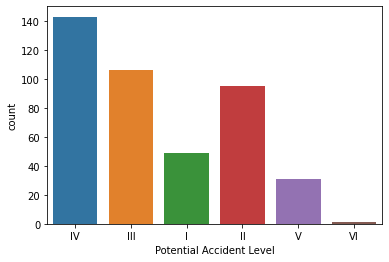

In [ ]:
sns.countplot(data['Potential Accident Level'])

There are around 140 accidents cases that belongs to Potential accident level 1 while Potential level 5 has the least number of accidents cases

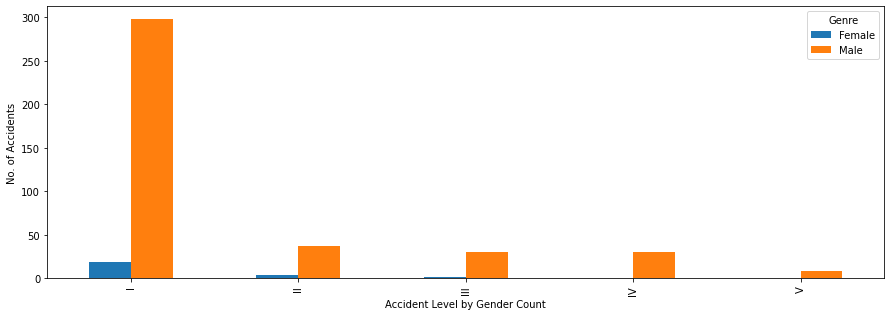

In [ ]:
pd.crosstab(data['Accident Level'],data['Genre']).plot(kind='bar',figsize=(15,5))
plt.xlabel('Accident Level by Gender Count')
plt.ylabel('No. of Accidents')
plt.show()

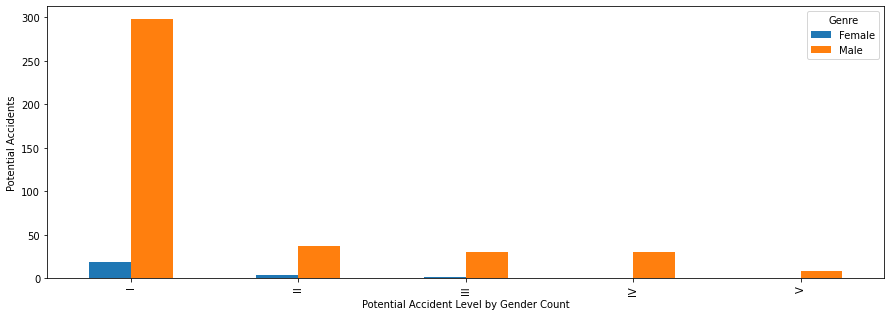

In [ ]:
pd.crosstab(data['Accident Level'],data['Genre']).plot(kind='bar',figsize=(15,5))
plt.xlabel('Potential Accident Level by Gender Count')
plt.ylabel('Potential Accidents')
plt.show()

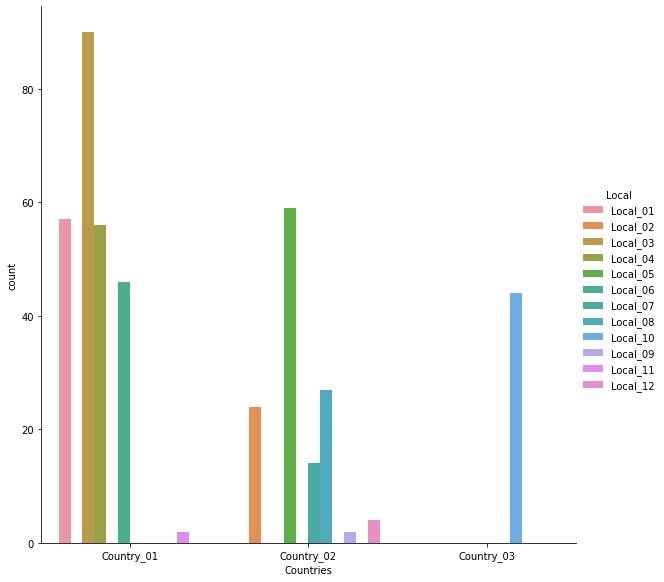

In [ ]:
sns.catplot(data=data, kind="count", x="Countries", hue = "Local", height=8, aspect=1)

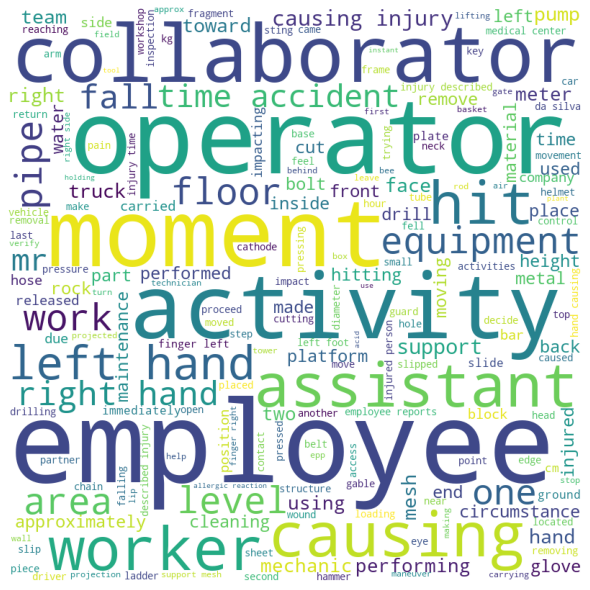

In [ ]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in data.Description: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
          
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

## **Pre- processing**

In [ ]:
import re

# will take only alphabets + will remove any unwanted special characters
data.Description = data.Description.apply(lambda x: re.sub('[^A-Za-z]+',' ',x)) 

data.Description = data.Description.apply(lambda x: x.lower())

data.Description = data.Description.apply(lambda x : x.strip())

#Removing StopWords
import nltk
import string
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english') + list(string.punctuation)

data.Description = data.Description.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

#lemmatization
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()
data.Description = data.Description.apply(lambda x: ' '.join([lemmatizer.lemmatize(w) for w in x.split()]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
# Spell Check Function
spell = SpellChecker() 
def spell_check(x):
    correct_word = []
    mispelled_word = x.split()
    for word in mispelled_word:
        correct_word.append(spell.correction(word))
    return ' '.join(correct_word)

In [ ]:
data.Description = data.Description.apply(lambda x: spell_check(x))


Removing 20 rare words

In [ ]:
freq = pd.Series(' '.join(data['Description']).split()).value_counts()[-20:] # 20 rare words
freq

gaze              1
restart           1
earthenware       1
disengaged        1
ae                1
lumbar            1
solubilization    1
touched           1
preventive        1
told              1
unevenness        1
dune              1
bladder           1
pyrotechnic       1
energize          1
absorbing         1
actuating         1
switched          1
submerged         1
overcoming        1
dtype: int64

In [ ]:
freq = list(freq.index)
data['Description'] = data['Description'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data['Description'].head()

0    removing drill rod jumbo maintenance superviso...
1    activation sodium sulphide pump piping uncoupl...
2    sub station milo located level collaborator ex...
3    approximately no ex ob personnel begin task un...
4    approximately circumstance mechanic anthony gr...
Name: Description, dtype: object

In [ ]:
data.Description[4]

'approximately circumstance mechanic anthony group leader eduardo eric fern nder injured three company improve performed removal pulley motor pump zap marcy am length am weight keg locked proceed heating pulley loosen come fall distance meter high hit instep right foot worker causing injury described'

In [ ]:
data.Description[12]

'collaborator report working ustulaci i realized cyclone duct obstructed opened door try unclog material detached projected towards employee causing small burn right heel'

In [ ]:
labels_al = data['Accident Level'].nunique() #target variable total count(/class)
labels_al

5

In [ ]:
labels_pal = data['Potential Accident Level'].nunique() #target variable total count(/class)
labels_pal

6

In [ ]:
all_len = []
for s in data.Description.values:
  all_len.append(len(s.split()))
print(max(all_len)) # maximum number of words in a sentence
print(all_len) # number of words in each sentence

95
[37, 27, 29, 51, 44, 26, 21, 32, 14, 34, 31, 41, 23, 34, 27, 23, 61, 18, 30, 33, 32, 38, 29, 23, 40, 36, 32, 39, 18, 13, 30, 43, 30, 51, 10, 23, 50, 28, 28, 49, 20, 30, 32, 26, 23, 21, 23, 49, 38, 56, 28, 72, 72, 32, 15, 23, 31, 20, 15, 56, 20, 44, 31, 11, 13, 18, 31, 27, 48, 60, 31, 15, 13, 45, 58, 41, 78, 78, 42, 95, 36, 35, 22, 34, 11, 32, 29, 53, 63, 19, 39, 29, 30, 44, 20, 38, 19, 44, 38, 19, 12, 20, 44, 13, 60, 49, 43, 12, 21, 29, 33, 21, 21, 13, 20, 38, 39, 59, 25, 43, 47, 17, 12, 20, 37, 36, 34, 20, 25, 59, 63, 63, 17, 13, 37, 31, 42, 45, 26, 29, 23, 42, 35, 64, 64, 18, 60, 58, 58, 58, 40, 58, 29, 27, 43, 68, 77, 51, 11, 42, 30, 37, 36, 25, 35, 25, 58, 58, 19, 67, 47, 48, 53, 19, 93, 22, 13, 20, 14, 45, 62, 21, 15, 13, 40, 31, 18, 19, 15, 55, 48, 14, 47, 31, 48, 23, 19, 49, 57, 18, 18, 16, 34, 16, 40, 32, 44, 32, 9, 12, 22, 28, 36, 20, 21, 47, 21, 31, 21, 33, 33, 19, 24, 30, 26, 22, 32, 33, 24, 26, 10, 43, 55, 61, 58, 47, 12, 25, 36, 40, 37, 22, 16, 45, 54, 25, 45, 23, 38, 4

In [ ]:
# a check to see how many sentence are having words greater than 50
count = len([i for i in all_len if i > 50])
print(count) 

62


In [ ]:
max_features = 20000
maxlen = 50
embedding_size = 200

In [ ]:
#will only take most frequent words

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(data.Description.values)
X = tokenizer.texts_to_sequences(data.Description.values)

In [ ]:
print(X)

[[171, 69, 110, 324, 65, 297, 237, 571, 27, 807, 1519, 1520, 186, 1053, 52, 27, 16, 61, 69, 18, 325, 2, 94, 1521, 186, 11, 94, 103, 57, 27, 1522, 19, 52, 88, 94, 326, 324], [1523, 1054, 1055, 42, 1524, 1525, 1526, 238, 1527, 15, 364, 572, 104, 59, 89, 475, 1056, 672, 1528, 573, 413, 298, 673, 1055, 238, 1529, 1530], [808, 574, 1057, 187, 24, 13, 809, 17, 575, 2, 239, 79, 29, 1531, 37, 1532, 810, 79, 188, 327, 31, 811, 812, 15, 4, 54, 13, 3, 10], [34, 72, 240, 365, 172, 576, 366, 577, 1533, 76, 1058, 189, 1059, 76, 674, 1534, 105, 1060, 675, 25, 476, 1535, 241, 20, 414, 58, 1536, 146, 2, 1537, 95, 813, 328, 76, 11, 55, 13, 1538, 329, 1539, 1540, 190, 270, 95, 76, 79, 477, 4, 2, 3, 10], [34, 40, 52, 1541, 1542, 1543, 1544, 1545, 1546, 1547, 45, 415, 77, 478, 62, 186, 173, 676, 42, 1548, 1549, 14, 367, 14, 84, 43, 814, 479, 1550, 173, 571, 215, 30, 578, 33, 368, 21, 815, 5, 54, 12, 3, 10, 39], [480, 330, 816, 216, 817, 818, 416, 481, 1061, 44, 53, 819, 217, 1551, 90, 174, 1552, 1553, 481,

In [ ]:
tokenizer.word_index.items()

dict_items([('employee', 1), ('hand', 2), ('causing', 3), ('left', 4), ('right', 5), ('operator', 6), ('i', 7), ('activity', 8), ('time', 9), ('injury', 10), ('moment', 11), ('worker', 12), ('collaborator', 13), ('am', 14), ('area', 15), ('one', 16), ('work', 17), ('equipment', 18), ('finger', 19), ('assistant', 20), ('hit', 21), ('accident', 22), ('pipe', 23), ('level', 24), ('my', 25), ('floor', 26), ('support', 27), ('mesh', 28), ('rock', 29), ('fall', 30), ('safety', 31), ('glove', 32), ('meter', 33), ('approximately', 34), ('team', 35), ('height', 36), ('part', 37), ('side', 38), ('described', 39), ('circumstance', 40), ('cut', 41), ('pump', 42), ('keg', 43), ('truck', 44), ('injured', 45), ('face', 46), ('metal', 47), ('used', 48), ('place', 49), ('towards', 50), ('medical', 51), ('mechanic', 52), ('performing', 53), ('foot', 54), ('two', 55), ('using', 56), ('point', 57), ('platform', 58), ('made', 59), ('remove', 60), ('end', 61), ('performed', 62), ('generating', 63), ('access

### **Sentence Padding**



In [ ]:
#sentence Padding
X = pad_sequences(X,maxlen=50,padding='post')
print(X.shape)

(425, 50)


In [ ]:
print(X[7])

[  34    7   52  113 1067 1068  369  579   96  299   42  160  243  420
  218  173  421  820  244  422  297 1555 1069  219  821  579   96  220
  580   57   19 1070    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


In [ ]:
num_words = len(tokenizer.word_index) + 1
print(num_words)

2676


##### **Glove Embedding**

In [ ]:
embedding_matrix = np.zeros((num_words,200))

embeddings = {}
for s in open(EMBEDDING_FILE):
  word = s.split(" ")[0]
  emd = s.split(" ")[1:]
  emd = np.asarray(emd,dtype='float32')
  embeddings[word] = emd

for word,i in tokenizer.word_index.items():
  embedding_vector = embeddings.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [ ]:
print(embedding_matrix)

[[ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.43524    -0.75510001  0.26128    ...  0.11221     0.040631
  -0.28641   ]
 [ 0.12782     0.28417    -0.045819   ...  0.12043    -0.57577002
   0.28336999]
 ...
 [-0.009495   -0.35078999 -0.71389002 ... -0.30366999 -0.1532
   0.66470999]
 [-0.30302     0.046487   -0.95086998 ...  0.55268002 -0.63020003
   0.094958  ]
 [ 0.37518999 -0.053434    0.26330999 ...  0.06385     0.34154999
   0.86989999]]


## **Model Building - AL**

### One hot encoding

In [ ]:
#LabelBinarizer
lb = LabelBinarizer()
Y_AL = lb.fit_transform(data['Accident Level'].values)
Y_AL

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0]])

### Create train and test sets


In [ ]:
#train-test split 
x_train,x_test,y_train,y_test = train_test_split(X,Y_AL,test_size=0.2,random_state=1)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(340, 50) (340, 5)
(85, 50) (85, 5)


### **Logistic Regression**

In [ ]:
#Logistic Regression Model
lmodel = LogisticRegression(solver='liblinear')
lmodel = OneVsRestClassifier(lmodel)

In [ ]:
lmodel.fit(x_train,y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='liblinear', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [ ]:
predicted_labels = lmodel.predict(x_test)
predicted_scores = lmodel.decision_function(x_test)
predicted_labels_train = lmodel.predict(x_train)

In [ ]:
print('Test data Accuracy score: ', accuracy_score(y_test, predicted_labels))

Test data Accuracy score:  0.6470588235294118


In [ ]:
print('Training data Accuracy score: ',accuracy_score(y_train,predicted_labels_train))

Training data Accuracy score:  0.7823529411764706


In [ ]:
acc_scr_regr_train_AL = accuracy_score(y_train, predicted_labels_train)
f1_scr_reg_train_AL = f1_score(y_train, predicted_labels_train, average='micro')
avg_scr_reg_train_AL = average_precision_score(y_train, predicted_labels_train, average='micro')
recall_scr_reg_train_AL = recall_score(y_train, predicted_labels_train, average='micro')
roc_scr_reg_train_AL = roc_auc_score(y_train, predicted_labels_train,average='micro')

print('Training matrix score:\n')
print('Accuracy score: ', acc_scr_regr_train_AL)
print('F1 score: ', f1_scr_reg_train_AL)
print('Average precision score: ',avg_scr_reg_train_AL )
print('Average recall score: ', recall_scr_reg_train_AL)
print('Average roc_auc_score score: ', roc_scr_reg_train_AL)

Training matrix score:

Accuracy score:  0.7823529411764706
F1 score:  0.8058823529411765
Average precision score:  0.6882698961937717
Average recall score:  0.8058823529411765
Average roc_auc_score score:  0.8786764705882353


In [ ]:
acc_scr_regr_test_AL = accuracy_score(y_test, predicted_labels)
f1_scr_reg_test_AL = f1_score(y_test, predicted_labels, average='micro')
avg_scr_reg_test_AL = average_precision_score(y_test, predicted_labels, average='micro')
recall_scr_reg_test_AL = recall_score(y_test, predicted_labels, average='micro')
roc_scr_reg_test_AL = roc_auc_score(y_test, predicted_labels,average='micro')

print('Training matrix score:\n')
print('Accuracy score: ', acc_scr_regr_test_AL )
print('F1 score: ', f1_scr_reg_test_AL )
print('Average precision score: ', avg_scr_reg_test_AL)
print('Average recall score: ', recall_scr_reg_test_AL )
print('Average roc_auc_score score: ', roc_scr_reg_test_AL )

Training matrix score:

Accuracy score:  0.6470588235294118
F1 score:  0.7045454545454546
Average precision score:  0.5510795087265675
Average recall score:  0.7294117647058823
Average roc_auc_score score:  0.8220588235294117


### Storing Logistic Regression Accuracy Scores (train and test).

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
results_train_LR = pd.DataFrame({'Model':['Logistic Regression'], 'accuracy': acc_scr_regr_train_AL, 'F1 score':f1_scr_reg_train_AL,
                        'precision': avg_scr_reg_train_AL, 'recall':recall_scr_reg_train_AL , 'roc_auc':roc_scr_reg_train_AL},index={'1'})
results_train_LR = results_train_LR[['Model', 'accuracy', 'F1 score', 'precision', 'recall', 'roc_auc']]


In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
results_test_LR = pd.DataFrame({'Model':['Logistic Regression'], 'accuracy': acc_scr_regr_test_AL, 'F1 score':f1_scr_reg_test_AL,
                        'precision': avg_scr_reg_test_AL, 'recall':recall_scr_reg_test_AL , 'roc_auc':roc_scr_reg_test_AL},index={'1'})
results_test_LR = results_test_LR[['Model', 'accuracy', 'F1 score', 'precision', 'recall', 'roc_auc']]


### **Random Forest**

In [ ]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
y_predr = classifier.predict(x_test)
y_predr_train = classifier.predict(x_train)

In [ ]:
acc_scr_rfc_train_AL = accuracy_score(y_train, y_predr_train)
f1_scr_rfc_train_AL = f1_score(y_train, y_predr_train, average='micro')
avg_scr_rfc_train_AL = average_precision_score(y_train, y_predr_train, average='micro')
recall_scr_rfc_train_AL = recall_score(y_train, y_predr_train, average='micro')
roc_scr_rfc_train_AL = roc_auc_score(y_train, y_predr_train,average='micro')

print('Training matrix score:\n')
print('Accuracy score: ', acc_scr_rfc_train_AL)
print('F1 score: ', f1_scr_rfc_train_AL)
print('Average precision score: ',avg_scr_rfc_train_AL )
print('Average recall score: ', recall_scr_rfc_train_AL)
print('Average roc_auc_score score: ', roc_scr_rfc_train_AL)

Training matrix score:

Accuracy score:  0.9264705882352942
F1 score:  0.9516616314199395
Average precision score:  0.9210358056265985
Average recall score:  0.9264705882352942
Average roc_auc_score score:  0.9606617647058824


In [ ]:
acc_scr_rfc_test_AL = accuracy_score(y_test, y_predr)
f1_scr_rfc_test_AL = f1_score(y_test, y_predr, average='micro')
avg_scr_rfc_test_AL = average_precision_score(y_test, y_predr, average='micro')
recall_scr_rfc_test_AL = recall_score(y_test, y_predr, average='micro')
roc_scr_rfc_test_AL = roc_auc_score(y_test, y_predr,average='micro')

print('Test matrix score:\n')
print('Accuracy score: ', acc_scr_rfc_test_AL)
print('F1 score: ', f1_scr_rfc_test_AL)
print('Average precision score: ',avg_scr_rfc_test_AL )
print('Average recall score: ', recall_scr_rfc_test_AL)
print('Average roc_auc_score score: ', roc_scr_rfc_test_AL)



Test matrix score:

Accuracy score:  0.6823529411764706
F1 score:  0.7160493827160493
Average precision score:  0.5775095492742551
Average recall score:  0.6823529411764706
Average roc_auc_score score:  0.8132352941176471


### Storing Random Forest Accuray Scores (test and train).

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
results_train_RF = pd.DataFrame({'Model':['Random Forest'], 'accuracy': acc_scr_rfc_train_AL, 'F1 score': f1_scr_rfc_train_AL,
                        'precision': avg_scr_rfc_train_AL, 'recall': recall_scr_rfc_train_AL , 'roc_auc': roc_scr_rfc_train_AL},index={'2'})
results_train_RF = results_train_RF[['Model', 'accuracy', 'F1 score', 'precision', 'recall', 'roc_auc']]


In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
results_test_RF = pd.DataFrame({'Model':['Random Forest'], 'accuracy': acc_scr_rfc_test_AL, 'F1 score': f1_scr_rfc_test_AL,
                        'precision': avg_scr_rfc_test_AL, 'recall': recall_scr_rfc_test_AL , 'roc_auc': roc_scr_rfc_test_AL},index={'2'})
results_test_RF = results_test_RF[['Model', 'accuracy', 'F1 score', 'precision', 'recall', 'roc_auc']]


### **Support Vector Machine (SVM)**

In [ ]:
clf = svm.SVC(kernel='poly',degree=5, C=1)
clf = OneVsRestClassifier(clf)

In [ ]:
clf.fit(x_train , y_train) # Fit the model

OneVsRestClassifier(estimator=SVC(C=1, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=5,
                                  gamma='scale', kernel='poly', max_iter=-1,
                                  probability=False, random_state=None,
                                  shrinking=True, tol=0.001, verbose=False),
                    n_jobs=None)

In [ ]:
y_pred = clf.predict(x_test)
y_pred_train = clf.predict(x_train)

In [ ]:
acc_scr_svm_train_AL = accuracy_score(y_train, y_pred_train)
f1_scr_svm_train_AL = f1_score(y_train, y_pred_train, average='micro')
avg_scr_svm_train_AL = average_precision_score(y_train, y_pred_train, average='micro')
recall_scr_svm_train_AL = recall_score(y_train, y_pred_train, average='micro')
roc_scr_svm_train_AL = roc_auc_score(y_train, y_pred_train,average='micro')

print('Training matrix score:\n')
print('Accuracy score: ', acc_scr_svm_train_AL)
print('F1 score: ', f1_scr_svm_train_AL)
print('Average precision score: ', avg_scr_svm_train_AL )
print('Average recall score: ', recall_scr_svm_train_AL)
print('Average roc_auc_score score: ', roc_scr_svm_train_AL)

Training matrix score:

Accuracy score:  0.9117647058823529
F1 score:  0.9131075110456552
Average precision score:  0.8514141939961826
Average recall score:  0.9117647058823529
Average roc_auc_score score:  0.9452205882352941


In [ ]:
#def print_evaluation_scores(y_val, predicted):
acc_scr_svm_test_AL = accuracy_score(y_test, y_pred)
f1_scr_svm_test_AL = f1_score(y_test, y_pred, average='micro')
avg_scr_svm_test_AL = average_precision_score(y_test, y_pred, average='micro')
recall_scr_svm_test_AL = recall_score(y_test, y_pred, average='micro')
roc_scr_svm_test_AL = roc_auc_score(y_test, y_pred,average='micro')

print('Test matrix score:\n')
print('Accuracy score: ', acc_scr_svm_test_AL)
print('F1 score: ', f1_scr_svm_test_AL)
print('Average precision score: ', avg_scr_svm_test_AL )
print('Average recall score: ', recall_scr_svm_test_AL)
print('Average roc_auc_score score: ', roc_scr_svm_test_AL)


Test matrix score:

Accuracy score:  0.6941176470588235
F1 score:  0.710843373493976
Average precision score:  0.5667683369644154
Average recall score:  0.6941176470588235
Average roc_auc_score score:  0.8147058823529412


### Storing SVM Accuracy Scores (train and test ).

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
results_train_SVM = pd.DataFrame({'Model':['SVM'], 'accuracy': acc_scr_svm_train_AL, 'F1 score': f1_scr_svm_train_AL,
                        'precision': avg_scr_svm_train_AL, 'recall':recall_scr_svm_train_AL , 'roc_auc':roc_scr_svm_train_AL},index={'3'})
results_train_SVM = results_train_SVM[['Model', 'accuracy', 'F1 score', 'precision', 'recall', 'roc_auc']]


In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
results_test_SVM = pd.DataFrame({'Model':['SVM'], 'accuracy': acc_scr_svm_test_AL, 'F1 score': f1_scr_svm_test_AL,
                        'precision': avg_scr_svm_test_AL, 'recall':recall_scr_svm_test_AL , 'roc_auc':roc_scr_svm_test_AL},index={'3'})
results_test_SVM = results_test_SVM[['Model', 'accuracy', 'F1 score', 'precision', 'recall', 'roc_auc']]


### **Boosting**

In [ ]:
ada = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=1,algorithm='SAMME')
ada = OneVsRestClassifier(ada)
ada.fit(x_train, y_train)

OneVsRestClassifier(estimator=AdaBoostClassifier(algorithm='SAMME',
                                                 base_estimator=None,
                                                 learning_rate=1.0,
                                                 n_estimators=50,
                                                 random_state=1),
                    n_jobs=None)

In [ ]:
y_preda = ada.predict(x_test)
y_preda_train = ada.predict(x_train)

In [ ]:
acc_scr_bst_train_AL = accuracy_score(y_train, y_preda_train)
f1_scr_bst_train_AL = f1_score(y_train, y_preda_train, average='micro')
avg_scr_bst_train_AL = average_precision_score(y_train, y_preda_train, average='micro')
recall_scr_bst_train_AL = recall_score(y_train, y_preda_train, average='micro')
roc_scr_bst_train_AL = roc_auc_score(y_train, y_preda_train,average='micro')

print('Training matrix score:\n')
print('Accuracy score: ', acc_scr_bst_train_AL)
print('F1 score: ', f1_scr_bst_train_AL)
print('Average precision score: ', avg_scr_bst_train_AL )
print('Average recall score: ', recall_scr_bst_train_AL)
print('Average roc_auc_score score: ', roc_scr_bst_train_AL)

Training matrix score:

Accuracy score:  0.7823529411764706
F1 score:  0.8372093023255814
Average precision score:  0.7316024340770791
Average recall score:  0.8470588235294118
Average roc_auc_score score:  0.9014705882352941


In [ ]:
#def print_evaluation_scores(y_val, predicted):
acc_scr_bst_test_AL = accuracy_score(y_test, y_preda)
f1_scr_bst_test_AL = f1_score(y_test, y_preda, average='micro')
avg_scr_bst_test_AL = average_precision_score(y_test, y_preda, average='micro')
recall_scr_bst_test_AL = recall_score(y_test, y_preda, average='micro')
roc_scr_bst_test_AL = roc_auc_score(y_test, y_preda,average='micro')

print('Test matrix score:\n')
print('Accuracy score: ', acc_scr_bst_test_AL)
print('F1 score: ', f1_scr_bst_test_AL)
print('Average precision score: ', avg_scr_bst_test_AL )
print('Average recall score: ', recall_scr_bst_test_AL)
print('Average roc_auc_score score: ', roc_scr_bst_test_AL)


Test matrix score:

Accuracy score:  0.6941176470588235
F1 score:  0.7261904761904763
Average precision score:  0.5838979447200567
Average recall score:  0.7176470588235294
Average roc_auc_score score:  0.8264705882352942


Storing Boosting Accuracy Scores (train and test).

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
results_train_bst = pd.DataFrame({'Model':['Boosting'], 'accuracy': acc_scr_bst_train_AL, 'F1 score': f1_scr_bst_train_AL,
                        'precision': avg_scr_bst_train_AL, 'recall':recall_scr_bst_train_AL , 'roc_auc':roc_scr_bst_train_AL},index={'4'})
results_train_bst = results_train_bst[['Model', 'accuracy', 'F1 score', 'precision', 'recall', 'roc_auc']]

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
results_test_bst = pd.DataFrame({'Model':['Boosting'], 'accuracy': acc_scr_bst_test_AL, 'F1 score': f1_scr_bst_test_AL,
                        'precision': avg_scr_bst_test_AL, 'recall':recall_scr_bst_test_AL , 'roc_auc':roc_scr_bst_test_AL},index={'4'})
results_test_bst = results_test_bst[['Model', 'accuracy', 'F1 score', 'precision', 'recall', 'roc_auc']]


### **Bagging**

In [ ]:
bag = BaggingClassifier(n_estimators=50, random_state=1)
bag = OneVsRestClassifier(bag)
bag.fit(x_train, y_train)

OneVsRestClassifier(estimator=BaggingClassifier(base_estimator=None,
                                                bootstrap=True,
                                                bootstrap_features=False,
                                                max_features=1.0,
                                                max_samples=1.0,
                                                n_estimators=50, n_jobs=None,
                                                oob_score=False, random_state=1,
                                                verbose=0, warm_start=False),
                    n_jobs=None)

In [ ]:
y_predb = bag.predict(x_test)
y_predb_train = bag.predict(x_train)

In [ ]:
acc_scr_bgn_train_AL = accuracy_score(y_train, y_predb_train)
f1_scr_bgn_train_AL = f1_score(y_train, y_predb_train, average='micro')
avg_scr_bgn_train_AL = average_precision_score(y_train, y_predb_train, average='micro')
recall_scr_bgn_train_AL = recall_score(y_train, y_predb_train, average='micro')
roc_scr_bgn_train_AL = roc_auc_score(y_train, y_predb_train,average='micro')

print('Training matrix score:\n')
print('Accuracy score: ', acc_scr_bgn_train_AL)
print('F1 score: ', f1_scr_bgn_train_AL)
print('Average precision score: ', avg_scr_bgn_train_AL )
print('Average recall score: ', recall_scr_bgn_train_AL)
print('Average roc_auc_score score: ', roc_scr_bgn_train_AL)



Training matrix score:

Accuracy score:  0.9882352941176471
F1 score:  0.9911504424778761
Average precision score:  0.9847406891750783
Average recall score:  0.9882352941176471
Average roc_auc_score score:  0.9933823529411765


In [ ]:
#def print_evaluation_scores(y_val, predicted):
acc_scr_bgn_test_AL = accuracy_score(y_test, y_predb)
f1_scr_bgn_test_AL = f1_score(y_test, y_predb, average='micro')
avg_scr_bgn_test_AL = average_precision_score(y_test, y_predb, average='micro')
recall_scr_bgn_test_AL = recall_score(y_test, y_predb, average='micro')
roc_scr_bgn_test_AL = roc_auc_score(y_test, y_predb,average='micro')

print('Test matrix score:\n')
print('Accuracy score: ', acc_scr_bgn_test_AL)
print('F1 score: ', f1_scr_bgn_test_AL)
print('Average precision score: ', avg_scr_bgn_test_AL )
print('Average recall score: ', recall_scr_bgn_test_AL)
print('Average roc_auc_score score: ', roc_scr_bgn_test_AL)

Test matrix score:

Accuracy score:  0.6941176470588235
F1 score:  0.7349397590361447
Average precision score:  0.5969208424110386
Average recall score:  0.7176470588235294
Average roc_auc_score score:  0.8294117647058824


### Storing Bagging Accuracy Scores (train and test).


In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
results_train_bgn = pd.DataFrame({'Model':['Bagging'], 'accuracy': acc_scr_bgn_train_AL, 'F1 score': f1_scr_bgn_train_AL,
                        'precision': avg_scr_bgn_train_AL, 'recall':recall_scr_bgn_train_AL , 'roc_auc':roc_scr_bgn_train_AL},index={'5'})
results_train_bgn = results_train_bgn[['Model', 'accuracy', 'F1 score', 'precision', 'recall', 'roc_auc']]

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
results_test_bgn = pd.DataFrame({'Model':['Bagging'], 'accuracy': acc_scr_bgn_train_AL, 'F1 score': f1_scr_bgn_train_AL,
                        'precision': avg_scr_bgn_train_AL, 'recall':recall_scr_bgn_train_AL , 'roc_auc':roc_scr_bgn_train_AL},index={'5'})
results_test_bgn = results_test_bgn[['Model', 'accuracy', 'F1 score', 'precision', 'recall', 'roc_auc']]


### **Neural Network**




In [ ]:
# Model architecture
modelNN = Sequential()
modelNN.add(Dense(512, input_dim=maxlen, kernel_initializer='normal', activation='relu'))
modelNN.add(Dense(256, kernel_initializer='normal',activation='relu'))
modelNN.add(Dropout(0.5))
modelNN.add(Flatten())
modelNN.add(Dense(128,activation='relu'))
modelNN.add(Dense(64,activation='relu'))
modelNN.add(Dropout(0.3))
modelNN.add(Dense(5,activation='softmax'))

# Compile the model
modelNN.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
modelNN.fit(x_train, y_train, epochs=50, batch_size=32, verbose= 1,validation_split=0.1)

Epoch 1/50
10/10 [==============================] - 4s 60ms/step - loss: 55.3436 - accuracy: 0.3905 - val_loss: 0.6006 - val_accuracy: 0.3235
Epoch 2/50
10/10 [==============================] - 0s 8ms/step - loss: 0.9978 - accuracy: 0.5249 - val_loss: 0.3744 - val_accuracy: 0.8529
Epoch 3/50
10/10 [==============================] - 0s 8ms/step - loss: 0.6702 - accuracy: 0.6260 - val_loss: 0.3453 - val_accuracy: 0.8824
Epoch 4/50
10/10 [==============================] - 0s 7ms/step - loss: 0.6525 - accuracy: 0.6953 - val_loss: 0.3347 - val_accuracy: 0.8824
Epoch 5/50
10/10 [==============================] - 0s 7ms/step - loss: 0.6214 - accuracy: 0.7029 - val_loss: 0.6865 - val_accuracy: 0.8529
Epoch 6/50
10/10 [==============================] - 0s 7ms/step - loss: 0.6509 - accuracy: 0.6775 - val_loss: 0.6269 - val_accuracy: 0.8824
Epoch 7/50
10/10 [==============================] - 0s 8ms/step - loss: 0.5934 - accuracy: 0.7137 - val_loss: 0.3032 - val_accuracy: 0.8824
Epoch 8/50
10/10 [

In [ ]:
print('Training data Accuracy score: ',modelNN.evaluate(x_train,y_train,verbose=1))

11/11 [==============================] - 0s 3ms/step - loss: 0.2327 - accuracy: 0.7412
Training data Accuracy score:  [0.23272328078746796, 0.7411764860153198]


In [ ]:
print('Testing data Accuracy score: ',modelNN.evaluate(x_test,y_test,verbose=1))

3/3 [==============================] - 0s 4ms/step - loss: 0.4456 - accuracy: 0.7529
Testing data Accuracy score:  [0.44559478759765625, 0.7529411911964417]


In [ ]:
y_predn = modelNN.predict(x_test)
y_predn_train = modelNN.predict(x_train)

In [ ]:
y_predn_c = modelNN.predict_classes(x_test)
y_predn_train_c = modelNN.predict_classes(x_train)

In [ ]:
acc_scr_NN_train_AL = accuracy_score(y_train, y_predn_train.round())
avg_scr_NN_train_AL  = precision_score(y_train, y_predn_train.round(), average='weighted')
recall_scr_NN_train_AL = recall_score(y_train, y_predn_train.round(),average="weighted")
f1_scr_NN_train_AL = f1_score(y_train, y_predn_train.round(), average="weighted")
roc_scr_NN_train_AL = roc_auc_score(y_train, y_predn_train,average='weighted',labels=Y_AL,multi_class='ovr')

print('Train matrix score:\n')

print('Average accuracy score: ', acc_scr_NN_train_AL)
print('Average precision score: ', avg_scr_NN_train_AL)
print('Average recall score: ', recall_scr_NN_train_AL)
print('F1 score: ', f1_scr_NN_train_AL)
print('Average roc_auc_score score: ', roc_scr_NN_train_AL)

Train matrix score:

Average accuracy score:  0.7264705882352941
Average precision score:  0.6356617647058823
Average recall score:  0.7264705882352941
F1 score:  0.6780392156862745
Average roc_auc_score score:  0.9021174213630379


In [ ]:
acc_scr_NN_test_AL = accuracy_score(y_test, y_predn.round())
f1_scr_NN_test_AL = f1_score(y_test, y_predn.round(), average="weighted")
avg_scr_NN_test_AL =  precision_score(y_test, y_predn.round(), average='weighted')
recall_scr_NN_test_AL = recall_score(y_test, y_predn.round(),average="weighted")
roc_scr_bgn_NN_AL = roc_auc_score(y_test, y_predn,average='weighted',labels=Y_AL,multi_class='ovr')

print('Test matrix score:\n')
print('Accuracy score: ', acc_scr_NN_test_AL)
print('F1 score: ', f1_scr_NN_test_AL)
print('Average precision score: ', avg_scr_NN_test_AL )
print('Average recall score: ', recall_scr_NN_test_AL)
print('Average roc_auc_score score: ', roc_scr_bgn_NN_AL)


Test matrix score:

Accuracy score:  0.7411764705882353
F1 score:  0.6453781512605041
Average precision score:  0.5715095676824947
Average recall score:  0.7411764705882353
Average roc_auc_score score:  0.4415269677111114


### Storing Neural Network Accuracy Scores (train and test).

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
results_train_NN = pd.DataFrame({'Model':['NN'], 'accuracy': acc_scr_NN_train_AL, 'F1 score': f1_scr_NN_train_AL,
                        'precision': avg_scr_NN_train_AL, 'recall':recall_scr_NN_train_AL , 'roc_auc':roc_scr_NN_train_AL},index={'6'})
results_train_NN = results_train_NN[['Model', 'accuracy', 'F1 score', 'precision', 'recall', 'roc_auc']]


In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
results_test_NN = pd.DataFrame({'Model':['NN'], 'accuracy': acc_scr_NN_test_AL, 'F1 score': f1_scr_NN_test_AL,
                        'precision': avg_scr_NN_test_AL, 'recall':recall_scr_NN_test_AL , 'roc_auc':roc_scr_bgn_NN_AL},index={'6'})
results_test_NN = results_test_NN[['Model', 'accuracy', 'F1 score', 'precision', 'recall', 'roc_auc']]


### **LSTM**

In [ ]:
model_lstm = Sequential()
model_lstm.add(Embedding(num_words,embedding_size,weights=[embedding_matrix],input_length=maxlen))
model_lstm.add(Dropout(0.3))
model_lstm.add(Bidirectional(LSTM(452,dropout=0.2,recurrent_dropout=0.2)))
model_lstm.add(Flatten())
model_lstm.add(Dense(256,activation='relu'))
model_lstm.add(Dense(128,activation='relu'))
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(labels_al,activation='softmax'))

In [ ]:
model_lstm.compile(optimizer='adam',metrics=['accuracy'],loss='binary_crossentropy')

In [ ]:
model_lstm.fit(x_train,y_train,batch_size=32,epochs=10,verbose=1,validation_split=0.1,shuffle=False)

Epoch 1/10
10/10 [==============================] - 12s 621ms/step - loss: 0.5190 - accuracy: 0.5637 - val_loss: 0.2209 - val_accuracy: 0.8824
Epoch 2/10
10/10 [==============================] - 5s 542ms/step - loss: 0.3594 - accuracy: 0.7052 - val_loss: 0.1929 - val_accuracy: 0.8824
Epoch 3/10
10/10 [==============================] - 5s 549ms/step - loss: 0.3215 - accuracy: 0.7061 - val_loss: 0.1999 - val_accuracy: 0.8824
Epoch 4/10
10/10 [==============================] - 5s 546ms/step - loss: 0.3231 - accuracy: 0.6971 - val_loss: 0.1954 - val_accuracy: 0.8824
Epoch 5/10
10/10 [==============================] - 5s 547ms/step - loss: 0.3264 - accuracy: 0.7088 - val_loss: 0.2216 - val_accuracy: 0.8824
Epoch 6/10
10/10 [==============================] - 6s 570ms/step - loss: 0.3023 - accuracy: 0.7114 - val_loss: 0.2293 - val_accuracy: 0.8824
Epoch 7/10
10/10 [==============================] - 6s 570ms/step - loss: 0.2943 - accuracy: 0.7232 - val_loss: 0.2294 - val_accuracy: 0.8824
Epoch

In [ ]:
print('Training data Accuracy score: ',model_lstm.evaluate(x_train,y_train,verbose=1))

11/11 [==============================] - 1s 80ms/step - loss: 0.1525 - accuracy: 0.8294
Training data Accuracy score:  [0.15251752734184265, 0.8294117450714111]


In [ ]:
print('Testing data Accuracy score: ',model_lstm.evaluate(x_test,y_test,verbose=1))

3/3 [==============================] - 0s 69ms/step - loss: 0.2924 - accuracy: 0.7529
Testing data Accuracy score:  [0.2923983335494995, 0.7529411911964417]


In [ ]:
y_predls = model_lstm.predict(x_test)
y_predls_train = model_lstm.predict(x_train)

In [ ]:
acc_scr_LSTM_train_AL = accuracy_score(y_train, y_predls_train.round())
avg_scr_LSTM_train_AL  = precision_score(y_train, y_predls_train.round(), average='weighted')
recall_scr_LSTM_train_AL = recall_score(y_train, y_predls_train.round(),average="weighted")
f1_scr_LSTM_train_AL = f1_score(y_train, y_predls_train.round(), average="weighted")
roc_scr_LSTM_train_AL = roc_auc_score(y_train, y_predls_train,average='weighted',labels=Y_AL,multi_class='ovr')

print('Train matrix score:\n')

print('Average accuracy score: ', acc_scr_LSTM_train_AL)
print('Average precision score: ', avg_scr_LSTM_train_AL)
print('Average recall score: ', recall_scr_LSTM_train_AL)
print('F1 score: ', f1_scr_LSTM_train_AL)
print('Average roc_auc_score score: ', roc_scr_LSTM_train_AL)

Train matrix score:

Average accuracy score:  0.7794117647058824
Average precision score:  0.8529567657451674
Average recall score:  0.7794117647058824
F1 score:  0.7613321918784766
Average roc_auc_score score:  0.9589461285702467


In [ ]:
acc_scr_LSTM_test_AL = accuracy_score(y_test, y_predls.round())
f1_scr_LSTM_test_AL = f1_score(y_test, y_predls.round(), average="weighted")
avg_scr_LSTM_test_AL =  precision_score(y_test, y_predls.round(), average='weighted')
recall_scr_LSTM_test_AL = recall_score(y_test, y_predls.round(),average="weighted")
roc_scr_LSTM_test_AL = roc_auc_score(y_test, y_predls,average='weighted',labels=Y_AL,multi_class='ovr')

print('Test matrix score:\n')
print('Accuracy score: ', acc_scr_LSTM_test_AL)
print('F1 score: ', f1_scr_LSTM_test_AL)
print('Average precision score: ', avg_scr_LSTM_test_AL )
print('Average recall score: ', recall_scr_LSTM_test_AL)
print('Average roc_auc_score score: ', roc_scr_LSTM_test_AL)



Test matrix score:

Accuracy score:  0.7529411764705882
F1 score:  0.6556222488995599
Average precision score:  0.5805811481218994
Average recall score:  0.7529411764705882
Average roc_auc_score score:  0.7759282259701327


In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Model':['LSTM'], 'accuracy': acc_scr_LSTM_train_AL, 'F1 score': f1_scr_LSTM_train_AL,
                        'precision': avg_scr_LSTM_train_AL, 'recall': recall_scr_LSTM_train_AL , 'roc_auc':roc_scr_LSTM_train_AL},index={'7'})
results_train = pd.concat([results_train_LR,results_train_RF, results_train_SVM, results_train_bgn, results_train_bst, results_train_NN, tempResultsDf])
results_train = results_train[['Model', 'accuracy', 'F1 score', 'precision', 'recall', 'roc_auc']]
results_train
print('******************************************************Training Metrics Accuracy Of AL****************************************************:\n')
print(results_train.to_markdown())



******************************************************Training Metrics Accuracy Of AL****************************************************:

|    | Model               |   accuracy |   F1 score |   precision |   recall |   roc_auc |
|---:|:--------------------|-----------:|-----------:|------------:|---------:|----------:|
|  1 | Logistic Regression |   0.782353 |   0.805882 |    0.68827  | 0.805882 |  0.878676 |
|  2 | Random Forest       |   0.926471 |   0.951662 |    0.921036 | 0.926471 |  0.960662 |
|  3 | SVM                 |   0.911765 |   0.913108 |    0.851414 | 0.911765 |  0.945221 |
|  5 | Bagging             |   0.988235 |   0.99115  |    0.984741 | 0.988235 |  0.993382 |
|  4 | Boosting            |   0.782353 |   0.837209 |    0.731602 | 0.847059 |  0.901471 |
|  6 | NN                  |   0.726471 |   0.678039 |    0.635662 | 0.726471 |  0.902117 |
|  7 | LSTM                |   0.779412 |   0.761332 |    0.852957 | 0.779412 |  0.958946 |


In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDfs = pd.DataFrame({'Model':['LSTM'], 'accuracy': acc_scr_LSTM_test_AL, 'F1 score':f1_scr_LSTM_test_AL,
                        'precision': avg_scr_LSTM_test_AL, 'recall':recall_scr_LSTM_test_AL , 'roc_auc':roc_scr_LSTM_test_AL},index={'7'})
results_test = pd.concat([results_train_LR,results_train_RF, results_train_SVM, results_train_bgn, results_train_bst, results_train_NN, tempResultsDfs])
results_test = results_test[['Model', 'accuracy', 'F1 score', 'precision', 'recall', 'roc_auc']]
results_test
print('******************************************Test Metrics Accuracy Of AL********************************************************************:\n')
print(results_train.to_markdown())


******************************************Test Metrics Accuracy Of AL********************************************************************:

|    | Model               |   accuracy |   F1 score |   precision |   recall |   roc_auc |
|---:|:--------------------|-----------:|-----------:|------------:|---------:|----------:|
|  1 | Logistic Regression |   0.782353 |   0.805882 |    0.68827  | 0.805882 |  0.878676 |
|  2 | Random Forest       |   0.926471 |   0.951662 |    0.921036 | 0.926471 |  0.960662 |
|  3 | SVM                 |   0.911765 |   0.913108 |    0.851414 | 0.911765 |  0.945221 |
|  5 | Bagging             |   0.988235 |   0.99115  |    0.984741 | 0.988235 |  0.993382 |
|  4 | Boosting            |   0.782353 |   0.837209 |    0.731602 | 0.847059 |  0.901471 |
|  6 | NN                  |   0.726471 |   0.678039 |    0.635662 | 0.726471 |  0.902117 |
|  7 | LSTM                |   0.779412 |   0.761332 |    0.852957 | 0.779412 |  0.958946 |


### Cross Validation and ML models accuracy projection as box plot.



In [ ]:
from sklearn import model_selection
#Using K fold to check how my algorighm varies throughout my data if we split it in 10 equal bins
models = []
models.append(('Logistic Regression', OneVsRestClassifier(RandomForestClassifier())))
models.append(('SVM', OneVsRestClassifier(svm.SVC())))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Adaptive Boosting', OneVsRestClassifier(AdaBoostClassifier())))
models.append(('Bagging', OneVsRestClassifier(BaggingClassifier())))
# evaluate each model
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=101)
	cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	print("Name = %s , Mean Accuracy = %f, SD Accuracy = %f" % (name, cv_results.mean(), cv_results.std()))

Name = Logistic Regression , Mean Accuracy = 0.723529, SD Accuracy = 0.100345
Name = SVM , Mean Accuracy = 0.738235, SD Accuracy = 0.095260
Name = Random Forest , Mean Accuracy = 0.691176, SD Accuracy = 0.109458
Name = Adaptive Boosting , Mean Accuracy = 0.567647, SD Accuracy = 0.106086
Name = Bagging , Mean Accuracy = 0.623529, SD Accuracy = 0.101715


[Text(0, 0, 'Logistic Regression'),
 Text(0, 0, 'SVM'),
 Text(0, 0, 'Random Forest'),
 Text(0, 0, 'Adaptive Boosting'),
 Text(0, 0, 'Bagging')]

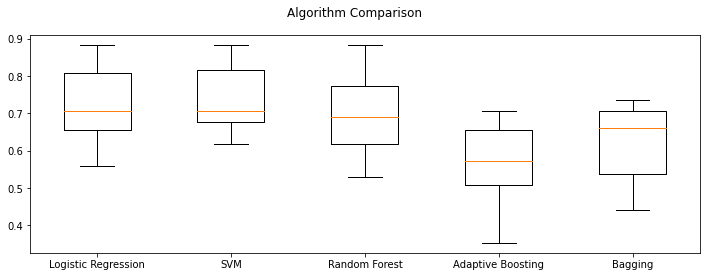

In [ ]:
# boxplot algorithm comparison
fig = plt.figure(figsize=(12,4))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot()
plt.boxplot(results)
ax.set_xticklabels(names)

#### Pickling and Saving to drive


In [ ]:
import types
import tempfile
import keras.models

def make_keras_picklable():
    def __getstate__(self):
        model_str = ""
        with tempfile.NamedTemporaryFile(suffix='.hdf5', delete=True) as fd:
            keras.models.save_model(self, fd.name, overwrite=True)
            model_str = fd.read()
        d = { 'model_str': model_str }
        return d

    def __setstate__(self, state):
        with tempfile.NamedTemporaryFile(suffix='.hdf5', delete=True) as fd:
            fd.write(state['model_str'])
            fd.flush()
            model = keras.models.load_model(fd.name)
        self.__dict__ = model.__dict__


    cls = keras.models.Model
    cls.__getstate__ = __getstate__
    cls.__setstate__ = __setstate__

In [ ]:
import pickle

In [ ]:

make_keras_picklable()

output = open('Cap1_Chatbot_AL_LSTM.pkl', 'wb')
pickle.dump(model_lstm,output)

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)  

# get the folder id where you want to save your file
file = drive.CreateFile()
file.SetContentFile('Cap1_Chatbot_AL_LSTM.pkl')
file.Upload() 

## Model Building - PAL

#### One Hot Encoding

Data Clubbing : Potential Accident Level : 'V' & 'VI , II & I

In [ ]:
Data = data

In [ ]:
Data['Potential Accident Level'] = data['Potential Accident Level'].str.replace('III','A')
Data['Potential Accident Level'] = data['Potential Accident Level'].str.replace('VI','V')
Data['Potential Accident Level'] = data['Potential Accident Level'].str.replace('II','I')
Data['Potential Accident Level'] = data['Potential Accident Level'].str.replace('A','III')

In [ ]:
Data['Potential Accident Level'].value_counts()

I      144
IV     143
III    106
V       32
Name: Potential Accident Level, dtype: int64

In [ ]:
lb = LabelBinarizer()
Y_PAL = lb.fit_transform(Data['Potential Accident Level'].values)
Y_PAL

array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       ...,
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0]])

Create test and train sets

In [ ]:
x_train_p,x_test_p,y_train_p,y_test_p = train_test_split(X,Y_PAL,test_size=0.2,random_state=1)
print(x_train_p.shape,y_train_p.shape)
print(x_test_p.shape,y_test_p.shape)

(340, 50) (340, 4)
(85, 50) (85, 4)


### **Logistic Regression**



In [ ]:
lmodel_p = LogisticRegression(solver='liblinear')
lmodel_p = OneVsRestClassifier(lmodel_p)

In [ ]:
lmodel_p.fit(x_train_p,y_train_p)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='liblinear', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [ ]:
predicted_labels_p = lmodel_p.predict(x_test_p)
predicted_labels_p_train = lmodel_p.predict(x_train_p)
predicted_scores_p = lmodel_p.decision_function(x_test_p)

In [ ]:
print('Test data Accuracy score: ', accuracy_score(y_test_p, predicted_labels_p))

Test data Accuracy score:  0.1411764705882353


In [ ]:
print('Training data Accuracy score: ',accuracy_score(y_train_p,predicted_labels_p_train))

Training data Accuracy score:  0.36470588235294116


In [ ]:
acc_scr_regr_train_PAL = accuracy_score(y_train_p, predicted_labels_p_train)
f1_scr_reg_train_PAL = f1_score(y_train_p, predicted_labels_p_train, average='micro')
avg_scr_reg_train_PAL = average_precision_score(y_train_p, predicted_labels_p_train, average='micro')
recall_scr_reg_train_PAL = recall_score(y_train_p, predicted_labels_p_train, average='micro')
roc_scr_reg_train_PAL = roc_auc_score(y_train_p, predicted_labels_p_train,average='micro')

print('Training matrix score:\n')
print('Accuracy score: ', acc_scr_regr_train_PAL)
print('F1 score: ', f1_scr_reg_train_PAL)
print('Average precision score: ',avg_scr_reg_train_PAL )
print('Average recall score: ', recall_scr_reg_train_PAL)
print('Average roc_auc_score score: ', roc_scr_reg_train_PAL)

Training matrix score:

Accuracy score:  0.36470588235294116
F1 score:  0.5009345794392523
Average precision score:  0.4223001508295626
Average recall score:  0.3941176470588235
Average roc_auc_score score:  0.667156862745098


In [ ]:
acc_scr_regr_test_PAL = accuracy_score(y_test_p, predicted_labels_p)
f1_scr_reg_test_PAL = f1_score(y_test_p, predicted_labels_p, average='micro')
avg_scr_reg_test_PAL = average_precision_score(y_test_p, predicted_labels_p, average='micro')
recall_scr_reg_test_PAL = recall_score(y_test_p, predicted_labels_p, average='micro')
roc_scr_reg_test_PAL = roc_auc_score(y_test_p, predicted_labels_p,average='micro')

print('Training matrix score:\n')
print('Accuracy score: ', acc_scr_regr_test_PAL )
print('F1 score: ', f1_scr_reg_test_PAL )
print('Average precision score: ', avg_scr_reg_test_PAL)
print('Average recall score: ', recall_scr_reg_test_PAL )
print('Average roc_auc_score score: ', roc_scr_reg_test_PAL )


Training matrix score:

Accuracy score:  0.1411764705882353
F1 score:  0.2
Average precision score:  0.25594771241830067
Average recall score:  0.15294117647058825
Average roc_auc_score score:  0.5137254901960784


### Storing Logistic Regression Accuracy Scores (train and test) .

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
results_train_LR_PAL = pd.DataFrame({'Model':['Logistic Regression'], 'accuracy': acc_scr_regr_train_PAL, 'F1 score':f1_scr_reg_train_PAL,
                        'precision': avg_scr_reg_train_PAL, 'recall':recall_scr_reg_train_PAL , 'roc_auc':roc_scr_reg_train_PAL},index={'1'})
results_train_LR_PAL = results_train_LR_PAL[['Model', 'accuracy', 'F1 score', 'precision', 'recall', 'roc_auc']]

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
results_test_LR_PAL = pd.DataFrame({'Model':['Logistic Regression'], 'accuracy': acc_scr_regr_test_PAL, 'F1 score':f1_scr_reg_test_PAL,
                        'precision': avg_scr_reg_test_PAL, 'recall':recall_scr_reg_test_PAL , 'roc_auc':roc_scr_reg_test_PAL},index={'1'})
results_test_LR_PAL = results_test_LR_PAL[['Model', 'accuracy', 'F1 score', 'precision', 'recall', 'roc_auc']]


### **Random Forest**

In [ ]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(x_train_p, y_train_p)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
y_predr_p = classifier.predict(x_test_p)
y_predr_p_train = classifier.predict(x_train_p)

In [ ]:
acc_scr_rfc_train_PAL = accuracy_score(y_train_p, y_predr_p_train)
f1_scr_rfc_train_PAL = f1_score(y_train_p, y_predr_p_train, average='micro')
avg_scr_rfc_train_PAL = average_precision_score(y_train_p, y_predr_p_train, average='micro')
recall_scr_rfc_train_PAL = recall_score(y_train_p, y_predr_p_train, average='micro')
roc_scr_rfc_train_PAL = roc_auc_score(y_train_p, y_predr_p_train,average='micro')

print('Training matrix score:\n')
print('Accuracy score: ', acc_scr_rfc_train_PAL)
print('F1 score: ', f1_scr_rfc_train_PAL)
print('Average precision score: ',avg_scr_rfc_train_PAL )
print('Average recall score: ', recall_scr_rfc_train_PAL)
print('Average roc_auc_score score: ', roc_scr_rfc_train_PAL)

Training matrix score:

Accuracy score:  0.9058823529411765
F1 score:  0.9491525423728814
Average precision score:  0.9264801066057492
Average recall score:  0.9058823529411765
Average roc_auc_score score:  0.9524509803921568


In [ ]:
acc_scr_rfc_test_PAL = accuracy_score(y_test_p, y_predr_p)
f1_scr_rfc_test_PAL = f1_score(y_test_p, y_predr_p, average='micro')
avg_scr_rfc_test_PAL = average_precision_score(y_test_p, y_predr_p, average='micro')
recall_scr_rfc_test_PAL = recall_score(y_test_p, y_predr_p, average='micro')
roc_scr_rfc_test_PAL = roc_auc_score(y_test_p, y_predr_p,average='micro')

print('Test matrix score:\n')
print('Accuracy score: ', acc_scr_rfc_test_PAL)
print('F1 score: ', f1_scr_rfc_test_PAL)
print('Average precision score: ',avg_scr_rfc_test_PAL )
print('Average recall score: ', recall_scr_rfc_test_PAL)
print('Average roc_auc_score score: ', roc_scr_rfc_test_PAL)


Test matrix score:

Accuracy score:  0.21176470588235294
F1 score:  0.3185840707964602
Average precision score:  0.3331932773109244
Average recall score:  0.21176470588235294
Average roc_auc_score score:  0.5862745098039215


### Storing Random Forest Accuracy Scores (train and test).

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
results_train_RF_PAL = pd.DataFrame({'Model':['Random Forest'], 'accuracy': acc_scr_rfc_train_PAL, 'F1 score': f1_scr_rfc_train_PAL,
                        'precision': avg_scr_rfc_train_PAL, 'recall': recall_scr_rfc_train_PAL , 'roc_auc': roc_scr_rfc_train_PAL},index={'2'})
results_train_RF_PAL = results_train_RF_PAL[['Model', 'accuracy', 'F1 score', 'precision', 'recall', 'roc_auc']]

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
results_test_RF_PAL = pd.DataFrame({'Model':['Random Forest'], 'accuracy': acc_scr_rfc_test_PAL, 'F1 score': f1_scr_rfc_test_PAL,
                        'precision': avg_scr_rfc_test_PAL, 'recall': recall_scr_rfc_test_PAL , 'roc_auc': roc_scr_rfc_test_PAL},index={'2'})
results_test_RF_PAL = results_test_RF_PAL[['Model', 'accuracy', 'F1 score', 'precision', 'recall', 'roc_auc']]


### **Support Vector Machine (SVM)**

In [ ]:
clf.fit(x_train_p , y_train_p) # Fit the model

OneVsRestClassifier(estimator=SVC(C=1, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=5,
                                  gamma='scale', kernel='poly', max_iter=-1,
                                  probability=False, random_state=None,
                                  shrinking=True, tol=0.001, verbose=False),
                    n_jobs=None)

In [ ]:
y_pred_p = clf.predict(x_test_p)
y_pred_p_train = clf.predict(x_train_p)

In [ ]:
#def print_evaluation_scores(y_val, predicted):
acc_scr_svm_train_PAL = accuracy_score(y_train_p, y_pred_p_train)
f1_scr_svm_train_PAL = f1_score(y_train_p, y_pred_p_train, average='micro')
avg_scr_svm_train_PAL = average_precision_score(y_train_p, y_pred_p_train, average='micro')
recall_scr_svm_train_PAL = recall_score(y_train_p, y_pred_p_train, average='micro')
roc_scr_svm_train_PAL = roc_auc_score(y_train_p, y_pred_p_train,average='micro')

print('Training matrix score:\n')
print('Accuracy score: ', acc_scr_svm_train_PAL)
print('F1 score: ', f1_scr_svm_train_PAL)
print('Average precision score: ', avg_scr_svm_train_PAL )
print('Average recall score: ', recall_scr_svm_train_PAL)
print('Average roc_auc_score score: ', roc_scr_svm_train_PAL)

Training matrix score:

Accuracy score:  0.5911764705882353
F1 score:  0.7430683918669131
Average precision score:  0.6933823529411764
Average recall score:  0.5911764705882353
Average roc_auc_score score:  0.7955882352941177


In [ ]:
#def print_evaluation_scores(y_val, predicted):
acc_scr_svm_test_PAL = accuracy_score(y_test_p, y_pred_p)
f1_scr_svm_test_PAL = f1_score(y_test_p, y_pred_p, average='micro')
avg_scr_svm_test_PAL = average_precision_score(y_test_p, y_pred_p, average='micro')
recall_scr_svm_test_PAL = recall_score(y_test_p, y_pred_p, average='micro')
roc_scr_svm_test_PAL = roc_auc_score(y_test_p, y_pred_p,average='micro')

print('Test matrix score:\n')
print('Accuracy score: ', acc_scr_svm_test_PAL)
print('F1 score: ', f1_scr_svm_test_PAL)
print('Average precision score: ', avg_scr_svm_test_PAL )
print('Average recall score: ', recall_scr_svm_test_PAL)
print('Average roc_auc_score score: ', roc_scr_svm_test_PAL)

Test matrix score:

Accuracy score:  0.08235294117647059
F1 score:  0.22580645161290322
Average precision score:  0.26794871794871794
Average recall score:  0.16470588235294117
Average roc_auc_score score:  0.5333333333333334


### Storing SVM Accuracy Scores(train and test).




In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
results_train_SVM_PAL = pd.DataFrame({'Model':['SVM'], 'accuracy': acc_scr_svm_train_PAL, 'F1 score': f1_scr_svm_train_PAL,
                        'precision': avg_scr_svm_train_PAL, 'recall':recall_scr_svm_train_PAL , 'roc_auc':roc_scr_svm_train_PAL},index={'3'})
results_train_SVM_PAL = results_train_SVM_PAL[['Model', 'accuracy', 'F1 score', 'precision', 'recall', 'roc_auc']]

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
results_test_SVM_PAL = pd.DataFrame({'Model':['SVM'], 'accuracy': acc_scr_svm_test_PAL, 'F1 score': f1_scr_svm_test_PAL,
                        'precision': avg_scr_svm_test_PAL, 'recall':recall_scr_svm_test_PAL , 'roc_auc':roc_scr_svm_test_PAL},index={'3'})
results_test_SVM_PAL = results_test_SVM_PAL[['Model', 'accuracy', 'F1 score', 'precision', 'recall', 'roc_auc']]


### **Boosting**

In [ ]:
ada_p = AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=1,algorithm='SAMME')
ada_p = OneVsRestClassifier(ada_p)
ada_p.fit(x_train_p, y_train_p)

OneVsRestClassifier(estimator=AdaBoostClassifier(algorithm='SAMME',
                                                 base_estimator=None,
                                                 learning_rate=1.0,
                                                 n_estimators=50,
                                                 random_state=1),
                    n_jobs=None)

In [ ]:
y_preda_p = ada_p.predict(x_test_p)
y_preda_train_p = ada_p.predict(x_train_p)

In [ ]:
acc_scr_bst_train_PAL = accuracy_score(y_train_p, y_preda_train_p)
f1_scr_bst_train_PAL = f1_score(y_train_p, y_preda_train_p, average='micro')
avg_scr_bst_train_PAL = average_precision_score(y_train_p, y_preda_train_p, average='micro')
recall_scr_bst_train_PAL = recall_score(y_train_p, y_preda_train_p, average='micro')
roc_scr_bst_train_PAL = roc_auc_score(y_train_p, y_preda_train_p,average='micro')

print('Training matrix score:\n')
print('Accuracy score: ', acc_scr_bst_train_AL)
print('F1 score: ', f1_scr_bst_train_AL)
print('Average precision score: ', avg_scr_bst_train_AL )
print('Average recall score: ', recall_scr_bst_train_AL)
print('Average roc_auc_score score: ', roc_scr_bst_train_AL)

Training matrix score:

Accuracy score:  0.7823529411764706
F1 score:  0.8372093023255814
Average precision score:  0.7316024340770791
Average recall score:  0.8470588235294118
Average roc_auc_score score:  0.9014705882352941


In [ ]:
#def print_evaluation_scores(y_val, predicted):
acc_scr_bst_test_PAL = accuracy_score(y_test_p, y_preda_p)
f1_scr_bst_test_PAL = f1_score(y_test_p, y_preda_p, average='micro')
avg_scr_bst_test_PAL = average_precision_score(y_test_p, y_preda_p, average='micro')
recall_scr_bst_test_PAL = recall_score(y_test_p, y_preda_p, average='micro')
roc_scr_bst_test_PAL = roc_auc_score(y_test_p, y_preda_p,average='micro')

print('Test matrix score:\n')
print('Accuracy score: ', acc_scr_bst_test_AL)
print('F1 score: ', f1_scr_bst_test_AL)
print('Average precision score: ', avg_scr_bst_test_AL )
print('Average recall score: ', recall_scr_bst_test_AL)
print('Average roc_auc_score score: ', roc_scr_bst_test_AL)


Test matrix score:

Accuracy score:  0.6941176470588235
F1 score:  0.7261904761904763
Average precision score:  0.5838979447200567
Average recall score:  0.7176470588235294
Average roc_auc_score score:  0.8264705882352942


### Storing Boosting Accuracy Scores (train and test).

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
results_train_bst_PAL = pd.DataFrame({'Model':['Boosting'], 'accuracy': acc_scr_bst_train_PAL, 'F1 score': f1_scr_bst_train_PAL,
                        'precision': avg_scr_bst_train_PAL, 'recall':recall_scr_bst_train_PAL , 'roc_auc':roc_scr_bst_train_PAL},index={'4'})
results_train_bst_PAL = results_train_bst_PAL[['Model', 'accuracy', 'F1 score', 'precision', 'recall', 'roc_auc']]

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
results_test_bst_PAL = pd.DataFrame({'Model':['Boosting'], 'accuracy': acc_scr_bst_test_PAL, 'F1 score': f1_scr_bst_test_PAL,
                        'precision': avg_scr_bst_test_PAL, 'recall':recall_scr_bst_test_PAL , 'roc_auc':roc_scr_bst_test_PAL},index={'4'})
results_test_bst_PAL = results_test_bst_PAL[['Model', 'accuracy', 'F1 score', 'precision', 'recall', 'roc_auc']]


### **Bagging**

In [ ]:
from sklearn.ensemble import BaggingClassifier
bag_p = BaggingClassifier(n_estimators=50, random_state=1)
bag_p = OneVsRestClassifier(bag_p)
bag_p.fit(x_train_p, y_train_p)


OneVsRestClassifier(estimator=BaggingClassifier(base_estimator=None,
                                                bootstrap=True,
                                                bootstrap_features=False,
                                                max_features=1.0,
                                                max_samples=1.0,
                                                n_estimators=50, n_jobs=None,
                                                oob_score=False, random_state=1,
                                                verbose=0, warm_start=False),
                    n_jobs=None)

In [ ]:
y_predb_p = bag_p.predict(x_test_p)
y_predb_train_p = bag_p.predict(x_train_p)

In [ ]:
#def print_evaluation_scores(y_val, predicted):
acc_scr_bgn_train_PAL = accuracy_score(y_train_p, y_predb_train_p)
f1_scr_bgn_train_PAL = f1_score(y_train_p, y_predb_train_p, average='micro')
avg_scr_bgn_train_PAL = average_precision_score(y_train_p, y_predb_train_p, average='micro')
recall_scr_bgn_train_PAL = recall_score(y_train_p, y_predb_train_p, average='micro')
roc_scr_bgn_train_PAL = roc_auc_score(y_train_p, y_predb_train_p,average='micro')

print('Training matrix score:\n')
print('Accuracy score: ', acc_scr_bgn_train_PAL)
print('F1 score: ', f1_scr_bgn_train_PAL)
print('Average precision score: ', avg_scr_bgn_train_PAL )
print('Average recall score: ', recall_scr_bgn_train_PAL)
print('Average roc_auc_score score: ', roc_scr_bgn_train_PAL)



Training matrix score:

Accuracy score:  0.9941176470588236
F1 score:  0.9970501474926253
Average precision score:  0.9955882352941177
Average recall score:  0.9941176470588236
Average roc_auc_score score:  0.9970588235294118


In [ ]:
#def print_evaluation_scores(y_val, predicted):
acc_scr_bgn_test_PAL = accuracy_score(y_test, y_predb)
f1_scr_bgn_test_PAL = f1_score(y_test, y_predb, average='micro')
avg_scr_bgn_test_PAL = average_precision_score(y_test, y_predb, average='micro')
recall_scr_bgn_test_PAL = recall_score(y_test, y_predb, average='micro')
roc_scr_bgn_test_PAL = roc_auc_score(y_test, y_predb,average='micro')

print('Test matrix score:\n')
print('Accuracy score: ', acc_scr_bgn_test_PAL)
print('F1 score: ', f1_scr_bgn_test_PAL)
print('Average precision score: ', avg_scr_bgn_test_PAL )
print('Average recall score: ', recall_scr_bgn_test_PAL)
print('Average roc_auc_score score: ', roc_scr_bgn_test_PAL)

Test matrix score:

Accuracy score:  0.6941176470588235
F1 score:  0.7349397590361447
Average precision score:  0.5969208424110386
Average recall score:  0.7176470588235294
Average roc_auc_score score:  0.8294117647058824


Storing Bagging Accuracy Scores (train and test).

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
results_train_bgn_PAL = pd.DataFrame({'Model':['Bagging'], 'accuracy': acc_scr_bgn_train_PAL, 'F1 score': f1_scr_bgn_train_PAL,
                        'precision': avg_scr_bgn_train_PAL, 'recall':recall_scr_bgn_train_PAL , 'roc_auc':roc_scr_bgn_train_PAL},index={'5'})
results_train_bgn_PAL = results_train_bgn_PAL[['Model', 'accuracy', 'F1 score', 'precision', 'recall', 'roc_auc']]


In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
results_test_bgn_PAL = pd.DataFrame({'Model':['Bagging'], 'accuracy': acc_scr_bgn_train_PAL, 'F1 score': f1_scr_bgn_train_PAL,
                        'precision': avg_scr_bgn_train_PAL, 'recall':recall_scr_bgn_train_PAL , 'roc_auc':roc_scr_bgn_train_PAL},index={'5'})
results_test_bgn_PAL = results_test_bgn_PAL[['Model', 'accuracy', 'F1 score', 'precision', 'recall', 'roc_auc']]


### **Neural Network**

In [ ]:
# Model architecture
modelNN_p = Sequential()
modelNN_p.add(Dense(512, input_dim=maxlen, kernel_initializer='normal', activation='relu'))
modelNN_p.add(Dense(256, kernel_initializer='normal',activation='relu'))
modelNN_p.add(Dropout(0.5))
modelNN_p.add(Flatten())
modelNN_p.add(Dense(128,activation='relu'))
modelNN_p.add(Dense(64,activation='relu'))
modelNN_p.add(Dropout(0.3))
modelNN_p.add(Dense(4,activation='softmax'))

# Compile the model
modelNN_p.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
modelNN_p.fit(x_train_p, y_train_p, epochs=50, batch_size=32, verbose= 1,validation_split=0.1)

Epoch 1/50
10/10 [==============================] - 1s 24ms/step - loss: 159.8205 - accuracy: 0.2469 - val_loss: 0.6761 - val_accuracy: 0.3235
Epoch 2/50
10/10 [==============================] - 0s 7ms/step - loss: 0.8382 - accuracy: 0.2736 - val_loss: 0.6909 - val_accuracy: 0.2353
Epoch 3/50
10/10 [==============================] - 0s 7ms/step - loss: 0.7163 - accuracy: 0.3166 - val_loss: 0.6893 - val_accuracy: 0.2353
Epoch 4/50
10/10 [==============================] - 0s 7ms/step - loss: 0.6954 - accuracy: 0.3549 - val_loss: 0.6877 - val_accuracy: 0.2353
Epoch 5/50
10/10 [==============================] - 0s 7ms/step - loss: 0.7057 - accuracy: 0.2902 - val_loss: 0.6860 - val_accuracy: 0.2353
Epoch 6/50
10/10 [==============================] - 0s 8ms/step - loss: 0.6964 - accuracy: 0.3402 - val_loss: 0.6844 - val_accuracy: 0.2353
Epoch 7/50
10/10 [==============================] - 0s 8ms/step - loss: 0.6900 - accuracy: 0.3284 - val_loss: 0.6828 - val_accuracy: 0.2353
Epoch 8/50
10/10 

In [ ]:
y_predn_p = modelNN_p.predict(x_test_p)
y_predn_train_p = modelNN_p.predict(x_train_p)

In [ ]:
acc_scr_NN_train_PAL = accuracy_score(y_train_p, y_predn_train_p.round())
f1_scr_NN_train_PAL = f1_score(y_train_p, y_predn_train_p.round(), average="weighted")
avg_scr_NN_train_PAL =  precision_score(y_train_p, y_predn_train_p.round(), average='weighted')
recall_scr_NN_train_PAL = recall_score(y_train_p, y_predn_train_p.round(),average="weighted")
roc_scr_bgn_NN_train_PAL = roc_auc_score(y_train_p, y_predn_train_p,average='weighted',labels=Y_AL,multi_class='ovr')

print('Training matrix score of PAL:\n')
print('Accuracy score: ', acc_scr_NN_train_PAL)
print('F1 score: ', f1_scr_NN_train_PAL)
print('Average precision score: ', avg_scr_NN_train_PAL )
print('Average recall score: ', recall_scr_NN_train_PAL)
print('Average roc_auc_score score: ', roc_scr_bgn_NN_train_PAL)

Training matrix score of PAL:

Accuracy score:  0.2411764705882353
F1 score:  0.16851432880844647
Average precision score:  0.1294986960301362
Average recall score:  0.2411764705882353
Average roc_auc_score score:  0.6007019631786482


In [ ]:
#def print_evaluation_scores(y_val, predicted):
acc_scr_NN_test_PAL = accuracy_score(y_test_p, y_predb_p.round())
f1_scr_NN_test_PAL = f1_score(y_test_p, y_predb_p.round(), average="weighted")
avg_scr_NN_test_PAL =  precision_score(y_test_p, y_predb_p.round(), average='weighted')
recall_scr_NN_test_PAL = recall_score(y_test_p, y_predb_p.round(),average="weighted")
roc_scr_bgn_NN_PAL = roc_auc_score(y_test_p, y_predb_p,average='weighted',labels=Y_AL,multi_class='ovr')

print('Test matrix score of PAL:\n')
print('Accuracy score: ', acc_scr_NN_test_PAL)
print('F1 score: ', f1_scr_NN_test_PAL)
print('Average precision score: ', avg_scr_NN_test_PAL )
print('Average recall score: ', recall_scr_NN_test_PAL)
print('Average roc_auc_score score: ', roc_scr_bgn_NN_PAL)


Test matrix score of PAL:

Accuracy score:  0.16470588235294117
F1 score:  0.2613391510450334
Average precision score:  0.5295625942684766
Average recall score:  0.17647058823529413
Average roc_auc_score score:  0.5395714103626283


### Storing NN Accuracy Scores (train and test).

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
results_train_NN_PAL = pd.DataFrame({'Model':['NN'], 'accuracy': acc_scr_NN_train_PAL, 'F1 score': f1_scr_NN_train_PAL,
                        'precision': avg_scr_NN_train_PAL, 'recall':recall_scr_NN_train_PAL , 'roc_auc':roc_scr_bgn_NN_train_PAL},index={'6'})
results_train_NN_PAL = results_train_NN_PAL[['Model', 'accuracy', 'F1 score', 'precision', 'recall', 'roc_auc']]

In [ ]:
#Store the accuracy results for each model in a dataframe for final comparison
results_test_NN_PAL = pd.DataFrame({'Model':['NN'], 'accuracy': acc_scr_NN_test_PAL, 'F1 score': f1_scr_NN_test_PAL,
                        'precision': avg_scr_NN_test_PAL, 'recall':recall_scr_NN_test_PAL , 'roc_auc':roc_scr_bgn_NN_PAL},index={'6'})
results_test_NN_PAL = results_test_NN_PAL[['Model', 'accuracy', 'F1 score', 'precision', 'recall', 'roc_auc']]


### **LSTM**

In [ ]:
model_lstm_p = Sequential()
model_lstm_p.add(Embedding(num_words,embedding_size,weights=[embedding_matrix],input_length=maxlen))
model_lstm_p.add(Dropout(0.3))
model_lstm_p.add(Bidirectional(LSTM(452,dropout=0.2,recurrent_dropout=0.2)))
model_lstm_p.add(Flatten())
model_lstm_p.add(Dense(256,activation='relu'))
model_lstm_p.add(Dense(128,activation='relu'))
model_lstm_p.add(Dropout(0.5))
model_lstm_p.add(Dense(4,activation='softmax'))

In [ ]:
model_lstm_p.compile(optimizer='adam',metrics=['accuracy'],loss='binary_crossentropy')

In [ ]:
model_lstm_p.fit(x_train_p,y_train_p,batch_size=64,epochs=10,verbose=1,validation_split=0.1,shuffle=False)

Epoch 1/10
5/5 [==============================] - 9s 742ms/step - loss: 0.6524 - accuracy: 0.2523 - val_loss: 0.5344 - val_accuracy: 0.3235
Epoch 2/10
5/5 [==============================] - 3s 558ms/step - loss: 0.5339 - accuracy: 0.3340 - val_loss: 0.5211 - val_accuracy: 0.4118
Epoch 3/10
5/5 [==============================] - 3s 581ms/step - loss: 0.5132 - accuracy: 0.4348 - val_loss: 0.5141 - val_accuracy: 0.3824
Epoch 4/10
5/5 [==============================] - 3s 553ms/step - loss: 0.4995 - accuracy: 0.4618 - val_loss: 0.5085 - val_accuracy: 0.3824
Epoch 5/10
5/5 [==============================] - 3s 543ms/step - loss: 0.4858 - accuracy: 0.4933 - val_loss: 0.5117 - val_accuracy: 0.4118
Epoch 6/10
5/5 [==============================] - 3s 549ms/step - loss: 0.4564 - accuracy: 0.5170 - val_loss: 0.5046 - val_accuracy: 0.3824
Epoch 7/10
5/5 [==============================] - 3s 556ms/step - loss: 0.4302 - accuracy: 0.5859 - val_loss: 0.5005 - val_accuracy: 0.4412
Epoch 8/10
5/5 [====

In [ ]:
y_predls_p = model_lstm_p.predict(x_test_p)
y_predls_train_p = model_lstm_p.predict(x_train_p)

In [ ]:
acc_scr_LSTM_train_PAL = accuracy_score(y_train_p, y_predls_train_p.round())
avg_scr_LSTM_train_PAL  = precision_score(y_train_p, y_predls_train_p.round(), average='weighted')
recall_scr_LSTM_train_PAL = recall_score(y_train_p, y_predls_train_p.round(),average="weighted")
f1_scr_LSTM_train_PAL = f1_score(y_train_p, y_predls_train_p.round(), average="weighted")
roc_scr_LSTM_train_PAL = roc_auc_score(y_train_p, y_predls_train_p,average='weighted',labels=Y_AL,multi_class='ovr')

print('Train matrix score:\n')

print('Average accuracy score: ', acc_scr_LSTM_train_PAL)
print('Average precision score: ', avg_scr_LSTM_train_PAL)
print('Average recall score: ', recall_scr_LSTM_train_PAL)
print('F1 score: ', f1_scr_LSTM_train_PAL)
print('Average roc_auc_score score: ', roc_scr_LSTM_train_PAL)


Train matrix score:

Average accuracy score:  0.8264705882352941
Average precision score:  0.85688819572619
Average recall score:  0.8264705882352941
F1 score:  0.8371082736429986
Average roc_auc_score score:  0.9616718070572091


In [ ]:
acc_scr_LSTM_test_PAL = accuracy_score(y_test_p, y_predls_p.round())
f1_scr_LSTM_test_PAL = f1_score(y_test_p, y_predls_p.round(), average="weighted")
avg_scr_LSTM_test_PAL =  precision_score(y_test_p, y_predls_p.round(), average='weighted')
recall_scr_LSTM_test_PAL = recall_score(y_test_p, y_predls_p.round(),average="weighted")
roc_scr_LSTM_PAL = roc_auc_score(y_test_p, y_predls_p,average='weighted',labels=Y_AL,multi_class='ovr')

print('Test matrix score:\n')
print('Accuracy score: ', acc_scr_LSTM_test_PAL)
print('F1 score: ', f1_scr_LSTM_test_PAL)
print('Average precision score: ', avg_scr_LSTM_test_PAL )
print('Average recall score: ', recall_scr_LSTM_test_PAL)
print('Average roc_auc_score score: ', roc_scr_LSTM_PAL)



Test matrix score:

Accuracy score:  0.5647058823529412
F1 score:  0.6104569860398521
Average precision score:  0.6869565217391305
Average recall score:  0.5647058823529412
Average roc_auc_score score:  0.7764575933695096


In [ ]:
#Accuracy results of training set for each model in a dataframe for final comparison
tempResultsDf_PAL = pd.DataFrame({'Model':['LSTM'], 'accuracy': acc_scr_LSTM_train_PAL, 'F1 score': f1_scr_LSTM_train_PAL,
                        'precision': avg_scr_LSTM_train_PAL, 'recall': recall_scr_LSTM_train_PAL , 'roc_auc':roc_scr_LSTM_train_PAL},index={'7'})
results_train_PAL = pd.concat([results_train_LR_PAL,results_train_RF_PAL, results_train_SVM_PAL, results_train_bgn_PAL, results_train_bst_PAL,results_train_NN_PAL,tempResultsDf_PAL])
results_train_PAL = results_train_PAL[['Model', 'accuracy', 'F1 score', 'precision', 'recall', 'roc_auc']]
results_train_PAL
print('*********************************************Training Metrics Accuracy Of PAL*****************************************************************:\n')
print(results_train_PAL.to_markdown())

*********************************************Training Metrics Accuracy Of PAL*****************************************************************:

|    | Model               |   accuracy |   F1 score |   precision |   recall |   roc_auc |
|---:|:--------------------|-----------:|-----------:|------------:|---------:|----------:|
|  1 | Logistic Regression |   0.364706 |   0.500935 |    0.4223   | 0.394118 |  0.667157 |
|  2 | Random Forest       |   0.905882 |   0.949153 |    0.92648  | 0.905882 |  0.952451 |
|  3 | SVM                 |   0.591176 |   0.743068 |    0.693382 | 0.591176 |  0.795588 |
|  5 | Bagging             |   0.994118 |   0.99705  |    0.995588 | 0.994118 |  0.997059 |
|  4 | Boosting            |   0.441176 |   0.594697 |    0.520181 | 0.461765 |  0.715686 |
|  6 | NN                  |   0.241176 |   0.168514 |    0.129499 | 0.241176 |  0.600702 |
|  7 | LSTM                |   0.826471 |   0.837108 |    0.856888 | 0.826471 |  0.961672 |


In [ ]:
#Accuracy results of test set for each model in a dataframe for final comparison
tempResultsDfs_PAL = pd.DataFrame({'Model':['LSTM'], 'accuracy': acc_scr_LSTM_test_PAL, 'F1 score':f1_scr_LSTM_test_PAL,
                        'precision': avg_scr_LSTM_test_PAL, 'recall':recall_scr_LSTM_test_PAL , 'roc_auc':roc_scr_LSTM_PAL},index={'7'})
results_test_PAL = pd.concat([results_test_LR_PAL,results_test_RF_PAL, results_test_SVM_PAL, results_test_bgn_PAL, results_test_bst_PAL, results_test_NN_PAL, tempResultsDfs_PAL])
results_test_PAL = results_test_PAL[['Model', 'accuracy', 'F1 score', 'precision', 'recall', 'roc_auc']]
results_test_PAL
print('***********************************************Test Metrics Accuracy Of PAL****************************************************************:\n')
print(results_test_PAL.to_markdown())

***********************************************Test Metrics Accuracy Of PAL****************************************************************:

|    | Model               |   accuracy |   F1 score |   precision |   recall |   roc_auc |
|---:|:--------------------|-----------:|-----------:|------------:|---------:|----------:|
|  1 | Logistic Regression |  0.141176  |   0.2      |    0.255948 | 0.152941 |  0.513725 |
|  2 | Random Forest       |  0.211765  |   0.318584 |    0.333193 | 0.211765 |  0.586275 |
|  3 | SVM                 |  0.0823529 |   0.225806 |    0.267949 | 0.164706 |  0.533333 |
|  5 | Bagging             |  0.994118  |   0.99705  |    0.995588 | 0.994118 |  0.997059 |
|  4 | Boosting            |  0.235294  |   0.353846 |    0.320654 | 0.270588 |  0.592157 |
|  6 | NN                  |  0.164706  |   0.261339 |    0.529563 | 0.176471 |  0.539571 |
|  7 | LSTM                |  0.564706  |   0.610457 |    0.686957 | 0.564706 |  0.776458 |


### Cross Validation and ML models accuracy projection as box plot.




In [ ]:
#Using K fold to check how my algorighm varies throughout my data if we split it in 10 equal bins
models = []
models.append(('Logistic Regression', OneVsRestClassifier(RandomForestClassifier())))
models.append(('SVM', OneVsRestClassifier(svm.SVC())))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Adaptive Boosting', OneVsRestClassifier(AdaBoostClassifier())))
models.append(('Adaptive Boosting', OneVsRestClassifier(BaggingClassifier())))





# evaluate each model
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=101)
	cv_results = model_selection.cross_val_score(model, x_train_p, y_train_p, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	print("Name = %s , Mean Accuracy = %f, SD Accuracy = %f" % (name, cv_results.mean(), cv_results.std()))

Name = Logistic Regression , Mean Accuracy = 0.161765, SD Accuracy = 0.080278
Name = SVM , Mean Accuracy = 0.014706, SD Accuracy = 0.019730
Name = Random Forest , Mean Accuracy = 0.123529, SD Accuracy = 0.065503
Name = Adaptive Boosting , Mean Accuracy = 0.235294, SD Accuracy = 0.095758
Name = Adaptive Boosting , Mean Accuracy = 0.176471, SD Accuracy = 0.093008


[Text(0, 0, 'Logistic Regression'),
 Text(0, 0, 'SVM'),
 Text(0, 0, 'Random Forest'),
 Text(0, 0, 'Adaptive Boosting'),
 Text(0, 0, 'Adaptive Boosting')]

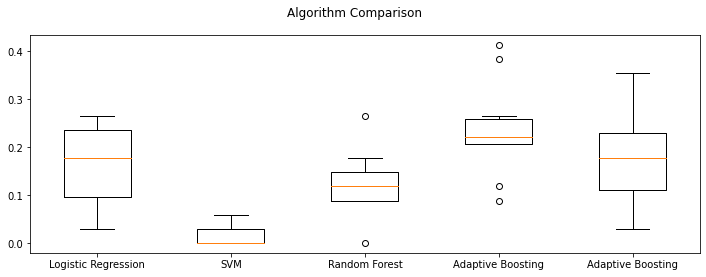

In [ ]:
# boxplot algorithm comparison
fig = plt.figure(figsize=(12,4))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot()
plt.boxplot(results)
ax.set_xticklabels(names)

### Pickle PAL model

In [ ]:
make_keras_picklable()

output = open('Cap1_Chatbot_PAL_LSTM.pkl', 'wb')
pickle.dump(model_lstm,output)

In [ ]:
# get the folder id where you want to save your file
file = drive.CreateFile()
file.SetContentFile('Cap1_Chatbot_PAL_LSTM.pkl')
file.Upload() 